In [43]:
# Load all libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import time
import seaborn as sns

import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [6]:
# Step 1: Load and preprocess data
train_df = pd.read_csv("training_data_final.csv")
test_df = pd.read_csv("testing_data_final.csv")

In [7]:
# Defining class mappings
class_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}

# Extract features (TF-IDF vectors) and labels from train data
X_train = train_df.drop(columns=['sentiment_class'])
y_train = train_df['sentiment_class'].map(class_mapping)

# Extract features (TF-IDF vectors) and labels from test data
X_test = test_df.drop(columns=['sentiment_class'])
y_test = test_df['sentiment_class'].map(class_mapping)

In [38]:
# Step 3: Build and train the neural network model
start_time = time.time()
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(3, activation='softmax') # Assuming 3 classes: positive, negative, neutral
])

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define a callback to print accuracy after each epoch
class PrintAccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("\nAccuracy for epoch {}: {:.4f}".format(epoch+1, logs['accuracy']))

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=16, verbose=1, callbacks=[PrintAccuracyCallback()])
print("Time taken for training : {} seconds".format(round(time.time()-start_time, 3)))

C:\Users\zsj36405\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
167/170 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4600 - loss: 1.0582
Accuracy for epoch 1: 0.5182
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4613 - loss: 1.0574 - val_accuracy: 0.5235 - val_loss: 0.9789
Epoch 2/10
167/170 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5422 - loss: 0.9229
Accuracy for epoch 2: 0.5377
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5421 - loss: 0.9224 - val_accuracy: 0.5397 - val_loss: 0.8970
Epoch 3/10
166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6324 - loss: 0.7696
Accuracy for epoch 3: 0.6485
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6329 - loss: 0.7692 - val_accuracy: 0.6176 - val_loss: 0.8190
Epoch 4/10
168/170 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7747 - loss: 0.6346
Accuracy for epoch 4: 0.7943
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7751 - loss: 0.6340 - val_accuracy: 0.6588 - val_loss: 0.7498
Epoch 5/10
166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.88

In [39]:
# Evaluate the best model
y_pred_prob = model.predict(X_test)
y_pred = tf.argmax(y_pred_prob, axis=1)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Best Model Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Best Model Accuracy: 0.725
Confusion Matrix:
[[107   8  71]
 [ 21  76  41]
 [ 35  11 310]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.58      0.61       186
           1       0.80      0.55      0.65       138
           2       0.73      0.87      0.80       356

    accuracy                           0.72       680
   macro avg       0.73      0.67      0.69       680
weighted avg       0.73      0.72      0.72       680



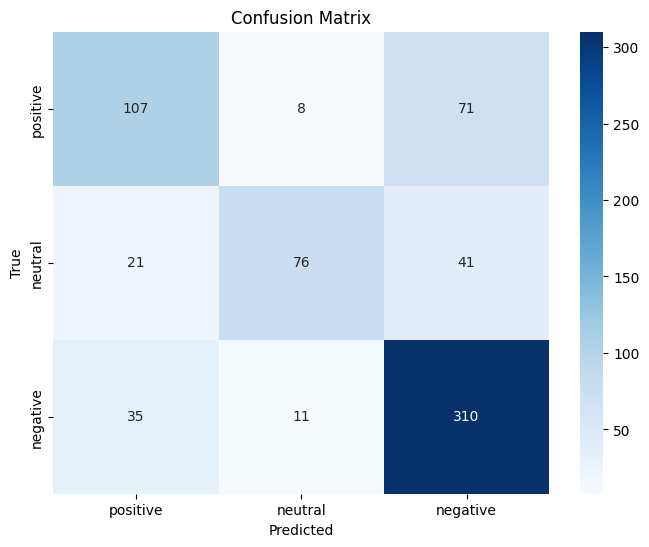

In [40]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_mapping.keys(), yticklabels=class_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

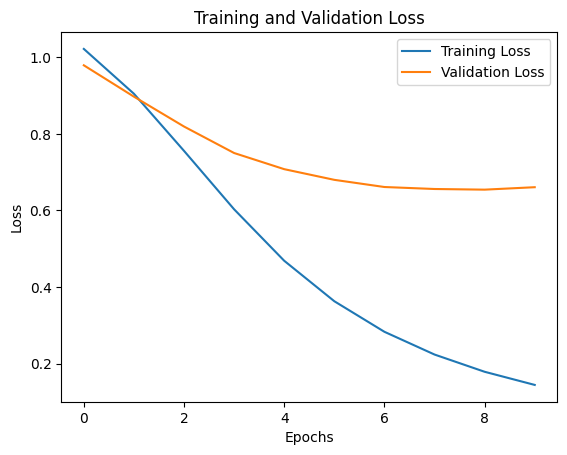

In [41]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

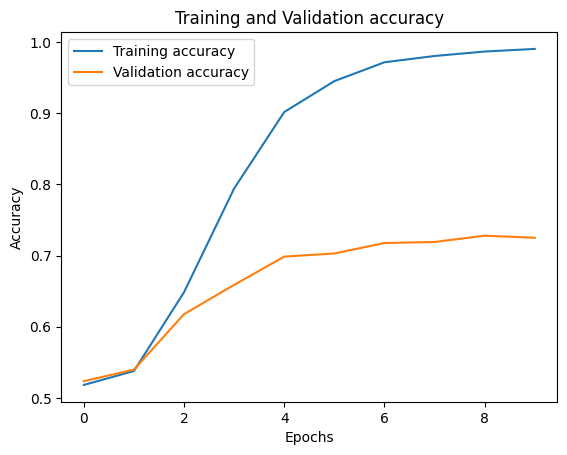

In [42]:
# Plot the training and validation loss
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation accuracy')
plt.show()

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


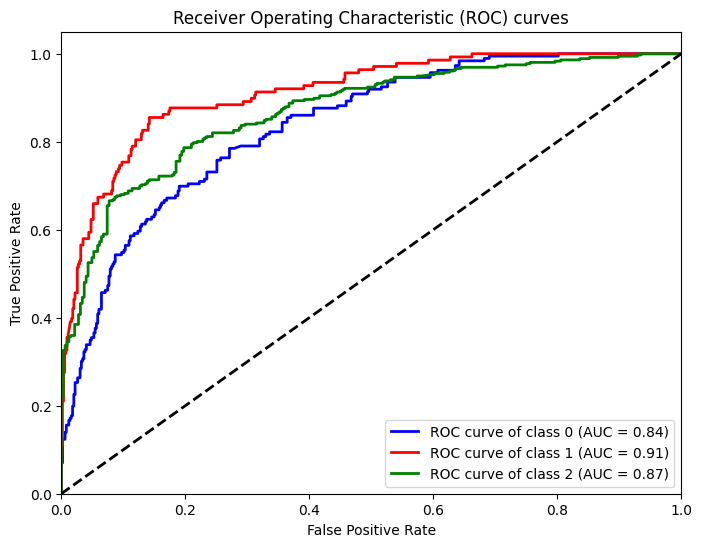

In [44]:
#Roc Auc
# Binarize the labels
n_classes = 3  # Number of classes
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Predict probabilities for each class
y_pred_prob = model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curves')
plt.legend(loc="lower right")
plt.show()
